# Variables aleatorias

Función que asigna un valor al resultado de un experimento aleatorio. Podría considerarse como un valor cuya respuesta es conocida, pero es afectada por el azar. Hay dos tipos principales de variables aleatorias: discretas y continuas. Algunos ejemplos de variables aleatorias discretas son: 
- al lanzar un dado se conoce que el resultado es $ d\in \{1, 2, 3, 4, 5, 6\}$
- al lanzar una moneda se conoce que el resultado es $ m \in \{\text{águila}, \text{sello}\} $
- en un parque de diversiones que admitió 100 personas en un día, la cantidad de personas que compraron en una tienda dentro del parque es $ p \in \{0, 1, 2, 3,..., 100\} $

Algunos ejemplos de variables aleatorias continuas son:
- el precio de un dólar (USD) contra el peso mexicano (MXN)
- la altura de una persona
- la distancia que vuela un pájaro

El factor aleatorio dentro de estas variables nos indica que todos los resultados son posibles, y que no se debe asumir sobre el resultado del experimento. Si bien las variables aleatorias pueden tomar valores predeterminados, ¿cuál es la probabilidad de que mi variable aleatoria tome un valor $x$?

# Distribuciones de probabilidad

Funciones matemáticas usadas para calcular la probabilidad de los posibles resultados de algún fenómeno. Hablando de una sola variable aleatoria, es una función matemática que le da un valor de probabilidad a cada caso posible de la variable. Para definir una distribución se necesita saber todos los casos posibles de la variable aleatoria y la probabilidad de cada uno.

E.g. un dado justo tiene la misma probabilidad de caer en cada una de sus 6 caras.

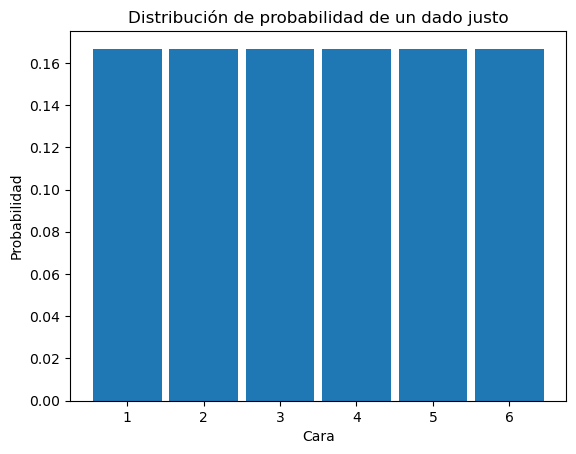

In [8]:
import matplotlib.pyplot as plt; plt.figure(); plt.hist([1, 2, 3, 4, 5, 6], align='left', bins=range(1, 8), density=True, rwidth=0.9)
plt.xlabel("Cara"); plt.ylabel("Probabilidad"); plt.title("Distribución de probabilidad de un dado justo");

Una distribución de probabilidad nos informa la probabilidad de que la variable aleatoria tome uno de sus valores. La distribución vista arriba es la distribución de una variable discreta. La altura promedio de un hombre en México es:

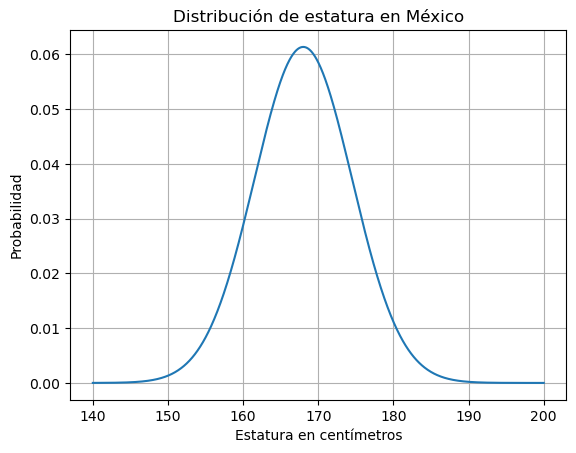

In [10]:
import numpy as np; h = np.linspace(140, 200, 1000); mu = 168; std=6.5;
plt.figure(); plt.plot(h, np.exp( -(h - mu)**2/(2*std**2) )/np.sqrt(2*np.pi*std**2)); 
plt.grid(); plt.xlabel("Estatura en centímetros"); plt.ylabel("Probabilidad"); plt.title("Distribución de estatura en México");

## Distribuciones comunes

### Normal

También llamada Gaussiana, o curva de campana. 

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

La intuición detrás es:
- El valor más esperado es la media
- La probabilidad de encontrar un valor alejado de la media disminuye en función de la distancia a la media
- La probabilidad de encontar un valor a una distancia $\sigma$ de la media es la misma de encontrar un valor a una distancia $-\sigma$

Algunos ejemplos son:
- Estatura humana
- Errores de mediciones (algo bien medido se esperaría que el error fuera 0)
- Tiempo de reacción en animales
- Presión arterial

Una aplicación un poco más compleja de una distribución que podría asemejar una distribución normal es el tiempo de entrega de un paquete: Idealmente se sabe la carga de trabajo y el tiempo de viaje, por lo que se estima la entrega de un paquete en $x$ días; puede que haya factores aleatorios que influyan en ese tiempo de entrega
- Tráfico en rutas de entrega
- Condiciones meteorológicas
- Tiempos de respuesta en aduana
- ¿Se enfermó el repartidor? ¿Hay repartidores disponibles para cubrirlo?

Esto significa que a pesar de que se espera que se cumpla el tiempo de entrega de $x$ días, la entrega podría variar de manera negativa (más días) o de manera positiva (menos días). La probabilidad de que me entreguen en $x$ días es la más alta, donde $x+1$ sigue siendo un caso muy probable. A pesar de que la posibilidad de $x+200$ días para entrega existe, es muy poco probable.

### Uniforme

$$ f(x) = \left\{
\begin{array}
    .\frac{1}{b-a} & a \leq x \leq b \\
    0 & x < a \ \text{ o }\  b < x \\
\end{array}
\right. $$

Distribuciones que describen experimentos aleatorios donde la probabilidad de resultado es la misma dentro de los límites establecidos. Algunos ejemplos son:
- lanzamiento de una moneda
- lanzamiento de un dado
- tomar una carta de una baraja
- ruleta de un casino
- resultado de una rifa

### Bernoulli

Distribución de probabilidad discreta para una variable aleatoria que puede tomar valores de $\{0, 1\}$ con probabilidad $p$ de éxito y probabilidad $q$ de fallo. Usualmente asociada con situaciones de éxito fallo por su naturaleza de clasificación binaria. Por ejemplo, al lanzar una moneda se puede asignar un valor de éxito (1) a "águila".

$$ P(X=1)=p\ \ \ = 1-P(X=0) = 1-q $$

### Binomial

Caracterizada por sus parámetros $n$ y $p$ (número de experimentos y probabilidad de éxito). La distribución binomial cuenta el número de éxitos en $n$ experimentos de Bernoulli independientes entre sí.

$$ P(X=k) = {n\choose k}p^k(1-p)^{n-k} $$

donde ${n\choose k}=\frac{n!}{k!(n-k)!}$

Ejemplos:
- Lanzar una moneda 1 vez esperando que el resultado sea águila (50\%)
- Lanzar una moneda 2 veces esperando que el resultado sea águila (25\%)

No confundir con la probabilidad de que una moneda caiga águila después de haber tirado 4 águilas. La probabilidad siempre es la misma, pero si lanzo una moneda dos veces tengo cuatro posibles finales. El 25% es que existe un cuarto de probabilidad de llegar a ese resultado final.

### Poisson

Distribución de probabilidad discreta que expresa la probabilidad que un número $k$ de eventos ocurran dentro de un tiempo predeterminado dado que estos eventos tienen media constante y son independientes uno de otro.

$$ P(K=k)=\frac{\lambda^k e^{-\lambda}}{k!} $$

Ejemplos:
- Un centro de atención al cliente recibe 100 llamadas por hora, 8 horas al día. La distribución de Poisson se puede usar para calcular la probabilidad de recibir 80 llamadas, o 150 llamadas en una hora.
- Si un drive-thru tiene 3 clientes cada 5 minutos. ¿Cuál es la probabilidad de que lleguen 5 clientes en un periodo de 5 minutos?

# Generación de muestras aleatorias

## Diferentes distribuciones utilizando `numpy`

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Normal

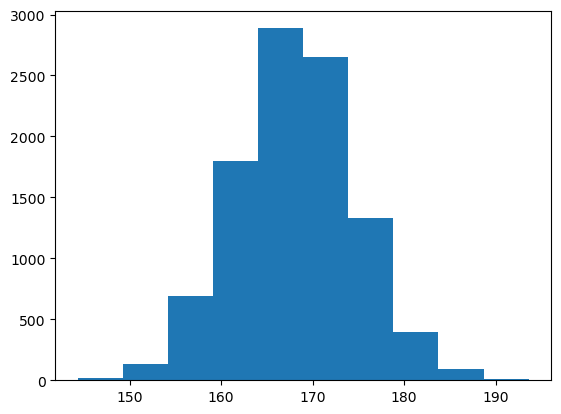

In [34]:
mu = 168
std = 6.5
plt.hist(np.random.normal(mu, std, 10000));

### Uniforme

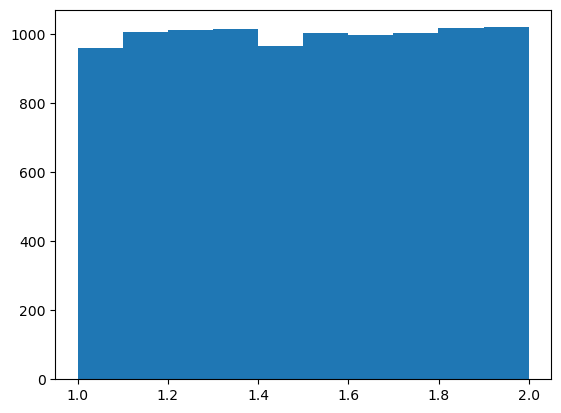

In [37]:
a = 1
b = 2
plt.hist(np.random.uniform(a, b, 10000));

### Bernoulli

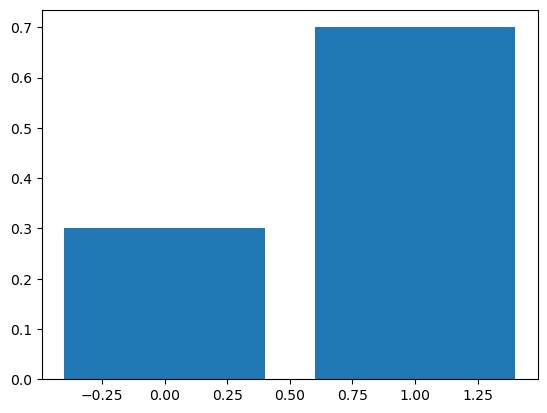

In [40]:
p = 0.7
q = 1-p
plt.bar([0, 1], [q, p]);

### Binomial

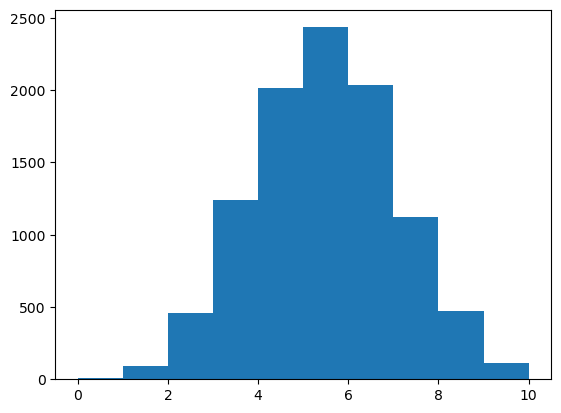

In [43]:
n = 10
p = 0.5
plt.hist(np.random.binomial(n, p, 10000));

### Poisson

(array([ 424.,  831., 3150., 1761., 2442.,  692.,  547.,   92.,   55.,
           6.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

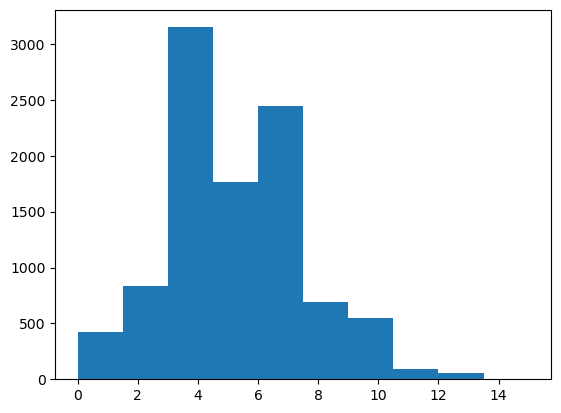

In [47]:
lam = 5
plt.hist(np.random.poisson(lam, 10000))

# Cálculo de probabilidades

1.- Avientas un dado tres veces. ¿Cuál es la probabilidad de tirar dos 6 seguidos?

In [51]:
n=10000000
np.random.seed(10)
d1=np.random.randint(1, 7, n)
d2=np.random.randint(1, 7, n)
d3=np.random.randint(1, 7, n)

caso1=((d1==6) & (d2==6) & (d3!=6))
caso2=((d3==6) & (d2==6) & (d1!=6))
caso3=((d3==6) & (d2==6) & (d1==6))

(caso1.sum()+caso2.sum()+caso3.sum())/n

0.0510668

2.- Avientas tres dados, uno tras otro. ¿Cuál es la probabilidad de obtener número sólo en orden ascendente?

In [54]:
n=10000000
np.random.seed(10)
d1=np.random.randint(1, 7, n)
d2=np.random.randint(1, 7, n)
d3=np.random.randint(1, 7, n)

exito=(d3>d2) & (d2>d1)
exito.sum() /n

0.0924843

3.- Tienes una baraja con 100 cartas, con valores del 1 al 100. Tomas dos cartas aleatoriamente sin reemplazo. ¿Cuál es la probabilidad de que una carta valga el doble que la otra?

In [57]:
n = 100000
casos=0
for i in range(n):
    carta1=np.random.choice(101, 2, replace=True)

    if (carta1[0] == 2 * carta1[1])|(carta1[1] == 2 * carta1[0]):
        casos+=1

probabilidad = casos/n
probabilidad

0.00942

In [69]:
1/99

0.010101010101010102

4.- Tienes dos monedas: una con águila y sello, y la otra con doble sello. Escoges una al azar y la tiras 5 veces; cae sello 5 veces. ¿Cuál es la probabilidad de que tomaste la moneda con doble sello?

5.- Dos personas juegan tenis y están empatadas en 40-40. Esto significa que el set continúa hasta que alguien haya anotado 2 puntos sobre el otro:
- Si un jugador anota la puntuación es A-40
- Si el segundo jugador anota la puntuación regresa a 40-40

El jugador 1 tiene una probabilidad de 60\% de ganar cada punto, mientras que la probabilidad del segundo jugador es de 40\%. ¿Cuál es la probabilidad de que el primer jugador gane el set?

### A10

- Menciona tres ejemplos de variables aleatorias discretas:

1. Lanzar una moneda
2. El número de alumos que llegan día a día al iteso
3. Número de fallos antes de ganar un premio

- Menciona tres ejemplos de variables aleatorias continuas:

1. El tiempo que se tarde en completar un tiempo en pista
2. El tiempo de vida de algo
3. El peso de algo fabricado en serie

- Dos equipos juegan una serie de juegos (4 de 7, el que gane 4 juegos gana). Cada equipo tiene un 50% de probabilidad de ganar cada juego (no empates). ¿Cuál es la probabilidad de que la serie se vaya a 7 juegos? (5/16)

In [59]:
n=10000
juegos = np.random.randint(0, 2, (n, 6))
A=np.sum(juegos==0, axis=1) #axis irá sumando las filas que sean iguales
B=np.sum(juegos==1, axis=1)

siete=(A==3) & (B==3)

siete.sum()/n



0.3185

- Una en mil personas tienen una enfermedad H, y la prueba de la enfermedad sale correcta 98% de las veces cuando la persona está enferma. Por otro lado, si la persona está enferma la prueba tiene un error del 1%. Si alguien se hace una prueba y sale positiva, ¿cuál es la probabilidad de que tengan la enfermedad? (98/1097)

In [61]:
#ejercicio 3
n=10000
caso=0
no=.01
si=.98
positivos=0
unade=.001 #1/1000

for i in range(n):
    enfermo=np.random.rand()<unade
    if enfermo:
        positivo=np.random.rand()<si
    else: 
        positivo=np.random.rand()<no
    if positivo:
        positivos +=1 #si si
        if enfermo: 
            caso+=1
probabilidad=caso/positivos
probabilidad



0.0891089108910891

In [41]:
#código profe
import numpy as np
n=100000
personas=np.random.choice([0, 1], n, p=[0.999, .001])
t1_d1=np.random.choice([0, 1], personas.sum(), p=[0.02, .98])
t1_d0=np.random.choice([0, 1], n-personas.sum(), p=[0.99, .01])
t1_d1.sum()/(t1_d1.sum()+t1_d0.sum())

0.09099099099099099

- Tres amigos diferentes te dijeron que está lloviendo, y cada persona tiene 1/3 de probabilidad de mentir. Si el pronóstico del clima dijo que la probabilidad de lluvia era 25%, ¿cuál es la probabilidad de que sí esté lloviendo? (8/11)

In [69]:
n=10
casos=0
total=0
lluvia=.25
mentir=1/3
nomen=2/3

for i in range(n): 
    si=np.random.rand()<lluvia
    if si: 
        juan=np.random.rand()<nomen
        luis=np.random.rand()<nomen
        chuy=np.random.rand()<nomen
    else: 
        juan=np.random.rand()<mentir
        luis=np.random.rand()<mentir
        chuy=np.random.rand()<mentir
    if juan and luis and chuy: 
        total+=1
        if si: 
            casos+=1
casos/total


ZeroDivisionError: division by zero

In [ ]:
# codigo adaptado profe

n=1000000  
llueve=np.random.choice(